## Klinkenberg¶
k(g) = k(l) + c(1/pm)

kg = measured gas permeability pm = mean pressure kL = equivalent liquid permeability, i.e., absolute permeability, k c = slope of the line

c = b.k(l) = 6.9 kL^(-0.36)

 = f(k_l)

f'(k_l) = 4.416*k_l^(-0.36) + p_m

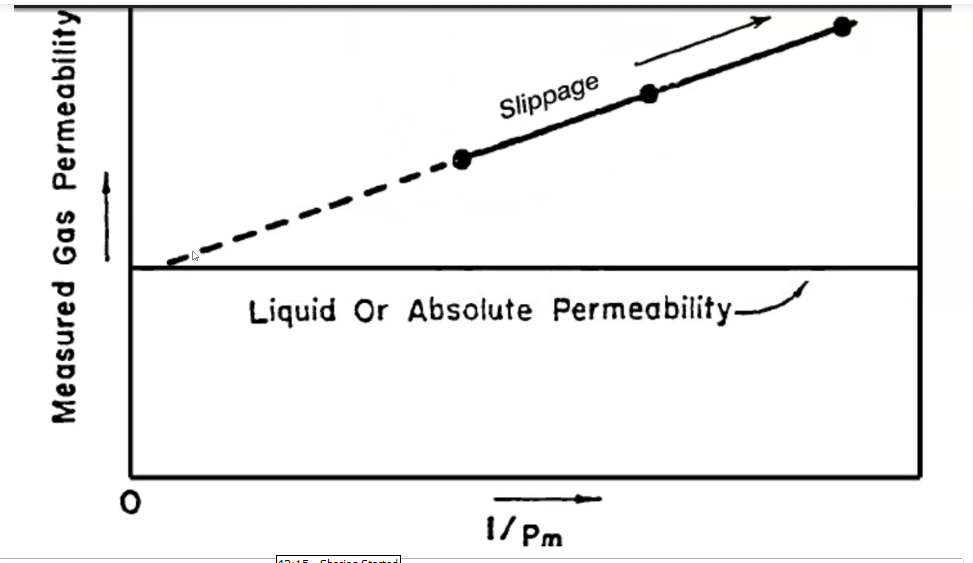

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# k=200, pm=2.152, kg= 47
k = float(input("enter the initial guess of absolute permeability(md):"))
pm = float(input("enter the mean pressure(psi):"))
kg = float(input("enter the gas perm.(md):"))

enter the initial guess of absolute permeability(md): 200
enter the mean pressure(psi): 2.152
enter the gas perm.(md): 47


In [5]:
count = 0
print(f"The value of kl_{count} is {k}")

while (abs(6.9*(k**0.64)+pm*k-pm*kg)>0.000000000001):
    print("=======================")
    updated_value = (6.9*(k**0.64)+pm*k-pm*kg)/(4.416*(k**(-0.36)) + pm) #f(k_l)/f'(k_l)
    k = k - updated_value
    count = count+1
    print(f"The value of kl_{count} is {k}")
    

print(f"The final value of Perm K is : {k}")

The value of kl_0 is 200.0
The value of kl_1 is 9.754036945499848
The value of kl_2 is 22.082522360389266
The value of kl_3 is 23.08612663545952
The value of kl_4 is 23.089385267602676
The value of kl_5 is 23.08938530060271
The final value of Perm K is : 23.08938530060271


In [6]:
k # kl c value in y=mx+c

23.08938530060271

In [7]:
m = (kg-k)/((1/pm)-0)

In [8]:
m

51.455642833102964

In [9]:
x_axis = np.linspace(0,1,200)
y_axis = m*x_axis+k

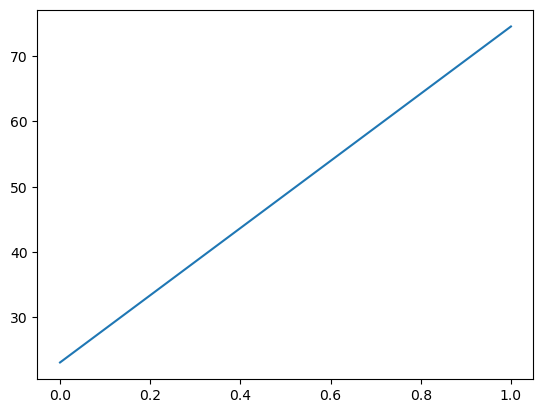

In [10]:
plt.plot(x_axis,y_axis)

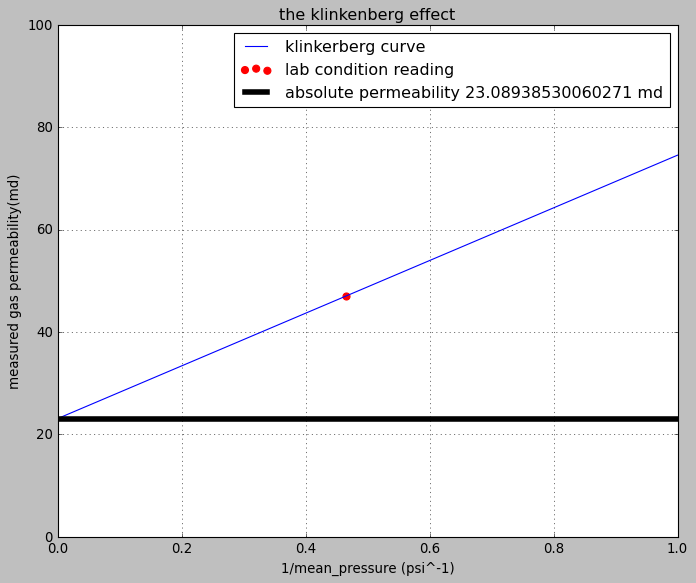

In [11]:
plt.style.use("classic")
plt.figure(figsize=(10,8))

plt.plot(x_axis, y_axis,label="klinkerberg curve")

plt.scatter(1/pm,kg,s=40,color="red",label ="lab condition reading")
plt.axhline(k,color="black",lw=5,label=f"absolute permeability {k} md")  

plt.xlim(0,1)
plt.ylim(0,100)
plt.xlabel("1/mean_pressure (psi^-1)")
plt.ylabel("measured gas permeability(md)") 
plt.title("the klinkenberg effect")
plt.legend()
plt.grid(True)

In [12]:
def klinkenberg(kg,pm,k):
    
    """
    This klinkenberg function calculates absolute permeability for given gas permeability at a given mean pressure.plot included.
    
    INPUTS:
    kg=> gas permeability in lab at a given mean pressure pm
    pm => mean pressure
    k=>User initial guess for absolute perm.
    
    return:
    k=> value of absolute permeability 
    
    
    
    """
    
    count = 0
    print(f"The value of kl_{count} is {k}")

    while (abs(6.9*(k**0.64)+pm*k-pm*kg)>0.000000000001):
        print("=======================")
        updated_value = (6.9*(k**0.64)+pm*k-pm*kg)/(4.416*(k**(-0.36)) + pm) #f(k_l)/f'(k_l)
        k = k - updated_value
        count = count+1
        print(f"The value of kl_{count} is {k}")
   

    print(f"The final value of Perm K is : {k}")
    m = (kg-k)/((1/pm)-0)

    x_axis= np.linspace(0,1,200)
    y_axis= m*x_axis+k
    
    plt.style.use("classic")
    plt.figure(figsize=(10,8))
    
    plt.plot(x_axis, y_axis,label="klinkerberg curve")
    
    plt.scatter(1/pm,kg,s=40,color="red",label ="lab condition reading")
    plt.axhline(k,color="black",lw=5,label=f"absolute permeability {k} md")  
    
    plt.xlim(0,1)
    plt.ylim(0,100)
    plt.xlabel("1/mean_pressure (psi^-1)")
    plt.ylabel("measured gas permeability(md)") 
    plt.title("the klinkenberg effect")
    plt.legend()
    plt.grid(True)
    return k


In [13]:
klinkenberg

<function __main__.klinkenberg(kg, pm, k)>

The value of kl_0 is 200
The value of kl_1 is 9.754036945499848
The value of kl_2 is 22.082522360389266
The value of kl_3 is 23.08612663545952
The value of kl_4 is 23.089385267602676
The value of kl_5 is 23.08938530060271
The final value of Perm K is : 23.08938530060271


23.08938530060271

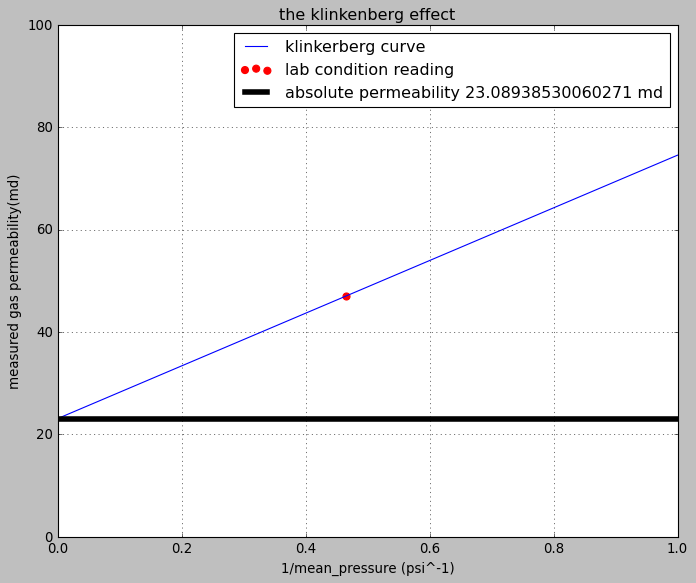

In [14]:
klinkenberg(47,2.152,200)

In [32]:
def klinkenberg(kg,pm,k):
    
    """
    This klinkenberg function calculates absolute permeability for given gas permeability at a given mean pressure.
    will calculate the gas permeability for the same reservoir rock sample at a given mean pressure.
    plot included.
    
    INPUTS:
    kg=> gas permeability in lab at a given mean pressure pm
    pm => mean pressure
    k=>User initial guess for absolute perm.
    
    return:
    k=> value of absolute permeability 
    
    
    
    """
    pmean_user = float(input("enter the mean pressure at which you want to calculate gas permeability(md): "))
    
    
    count = 0
    print(f"The value of kl_{count} is {k}")

    while (abs(6.9*(k**0.64)+pm*k-pm*kg)>0.000000000001):
        print("=======================")
        updated_value = (6.9*(k**0.64)+pm*k-pm*kg)/(4.416*(k**(-0.36)) + pm) #f(k_l)/f'(k_l)
        k = k - updated_value
        count = count+1
        print(f"The value of kl_{count} is {k}")
   

    print(f"The final value of Perm K is : {k}")
    m = (kg-k)/((1/pm)-0)

    x_axis= np.linspace(0,1,200)
    y_axis= m*x_axis+k
    
    ## Kg for user mean pressure
    kg_user = m*(1/pmean_user)+k
    print(f"the value of gas permeability at mean pressure of {pmean_user} psi is {kg_user} md")
    
    plt.style.use("classic")
    plt.figure(figsize=(10,8))
    
    plt.plot(x_axis, y_axis,label="klinkerberg curve")
    
    plt.scatter(1/pm,kg,s=40,color="red",label ="lab condition reading")
    plt.scatter(1/pmean_user,kg_user,s=45,color="green",label =f"user asked permeability {kg_user} md")
    plt.axhline(k,color="black",lw=5,label=f"absolute permeability {k} md")  
    
    plt.xlim(0,1)
    plt.ylim(0,100)
    plt.xlabel("1/mean_pressure (psi^-1)")
    plt.ylabel("measured gas permeability(md)") 
    plt.title("the klinkenberg effect")
    plt.legend()
    plt.grid(True)
    return k


enter the mean pressure at which you want to calculate gas permeability(md):  1000


The value of kl_0 is 200
The value of kl_1 is 9.754036945499848
The value of kl_2 is 22.082522360389266
The value of kl_3 is 23.08612663545952
The value of kl_4 is 23.089385267602676
The value of kl_5 is 23.08938530060271
The final value of Perm K is : 23.08938530060271
the value of gas permeability at mean pressure of 1000.0 psi is 23.140840943435812 md


23.08938530060271

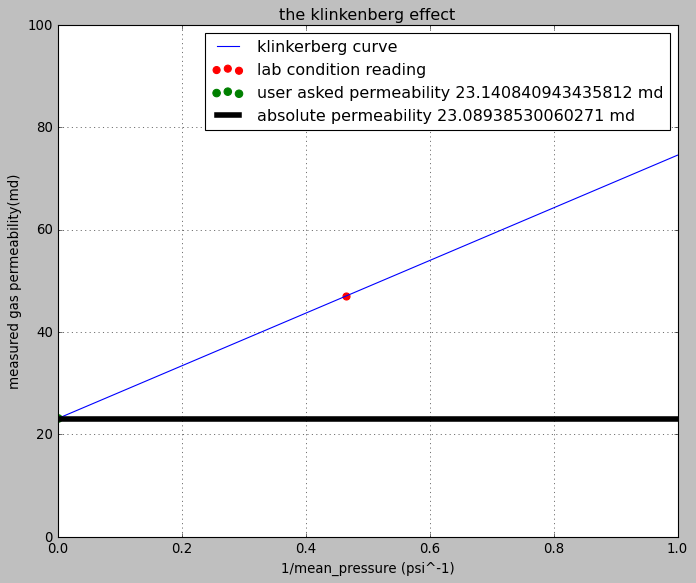

In [34]:
klinkenberg(47,2.152,200)

## Pressure profile
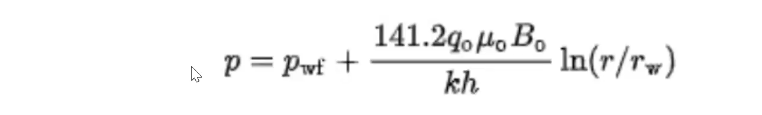

In [36]:
re = float(input("outer radius of reservoir(ft): "))
rw = float(input("radius of well bore(ft): "))
pwf = float(input("bottomhole pressure(psi): "))
h = float(input("net pay thickness or reservoir thickness(ft): "))
k = float(input("average reservoir permeability(md): "))
q = float(input("flowrate (stb/day): "))
mu = float(input("oil viscosity: "))
b = 1

outer radius of reservoir(ft):  1800
radius of well bore(ft):  0.5
bottomhole pressure(psi):  1500
net pay thickness or reservoir thickness(ft):  60
average reservoir permeability(md):  150
flowrate (stb/day):  200
oil viscosity:  15


In [19]:
r = np.linspace(re,rw,400)

In [38]:
p = pwf+((141.2*q*mu)/(k*h)*(np.log(r/rw)))

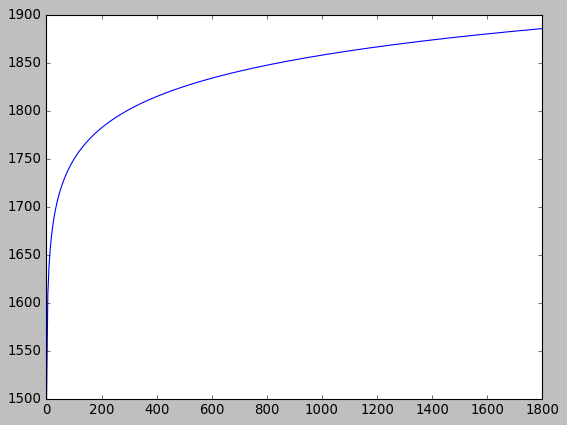

In [40]:
plt.plot(r,p)

In [42]:
def pressureprofile():
    """pressure profile function will calculate the pressure profile at different radius values
    inside a reservoir, and after calculating it will plot radius vs pressure.
    will take inputs of: 
    re,
    rw,
    pwf,
    h,
    k,
    q,
    mu

    output:
    return: radius vs pressure
    plot: radius vs pressure"""
    re = float(input("outer radius of reservoir(ft): "))
    rw = float(input("radius of well bore(ft): "))
    pwf = float(input("bottomhole pressure(psi): "))
    h = float(input("net pay thickness or reservoir thickness(ft): "))
    k = float(input("average reservoir permeability(md): "))
    q = float(input("flowrate (stb/day): "))
    mu = float(input("oil viscosity: "))
    b = 1
    r = np.linspace(re,rw,200)
    p = pwf+((141.2*q*mu)/(k*h)*(np.log(r/rw)))

    #plotting
    plt.figure(figsize = [8,6])
    plt.plot(r,p)
    plt.xlabel("r(ft)")
    plt.ylabel("p(r),psi")
    #plt.xlim(
    plt.ylim(pwf-500,p[-1]+1200)
    plt.title("reservoir pressure profile")
    plt.grid(True)
    

    return r,p

outer radius of reservoir(ft):  1500
radius of well bore(ft):  0.25
bottomhole pressure(psi):  1500
net pay thickness or reservoir thickness(ft):  50
average reservoir permeability(md):  25
flowrate (stb/day):  200
oil viscosity:  5


(array([1.50000000e+03, 1.49246357e+03, 1.48492714e+03, 1.47739070e+03,
        1.46985427e+03, 1.46231784e+03, 1.45478141e+03, 1.44724497e+03,
        1.43970854e+03, 1.43217211e+03, 1.42463568e+03, 1.41709925e+03,
        1.40956281e+03, 1.40202638e+03, 1.39448995e+03, 1.38695352e+03,
        1.37941709e+03, 1.37188065e+03, 1.36434422e+03, 1.35680779e+03,
        1.34927136e+03, 1.34173492e+03, 1.33419849e+03, 1.32666206e+03,
        1.31912563e+03, 1.31158920e+03, 1.30405276e+03, 1.29651633e+03,
        1.28897990e+03, 1.28144347e+03, 1.27390704e+03, 1.26637060e+03,
        1.25883417e+03, 1.25129774e+03, 1.24376131e+03, 1.23622487e+03,
        1.22868844e+03, 1.22115201e+03, 1.21361558e+03, 1.20607915e+03,
        1.19854271e+03, 1.19100628e+03, 1.18346985e+03, 1.17593342e+03,
        1.16839698e+03, 1.16086055e+03, 1.15332412e+03, 1.14578769e+03,
        1.13825126e+03, 1.13071482e+03, 1.12317839e+03, 1.11564196e+03,
        1.10810553e+03, 1.10056910e+03, 1.09303266e+03, 1.085496

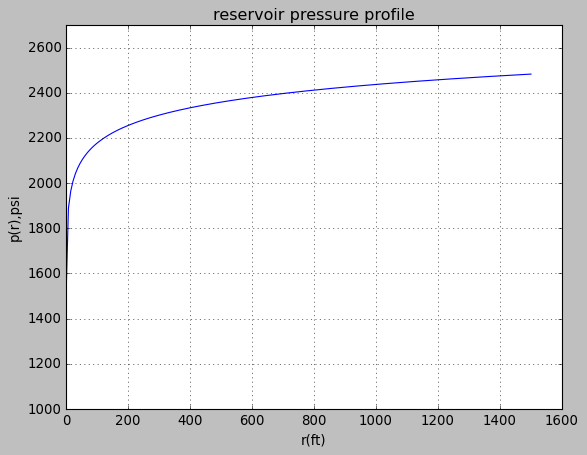

In [44]:
pressureprofile()

In [46]:
def pressureprofile():
    """pressure profile function will calculate the pressure profile at different radius values
    inside a reservoir, and after calculating it will plot radius vs pressure.
    will take inputs of: 
    re,
    rw,
    pwf,
    h,
    k,
    q,
    mu

    output:
    return: radius vs pressure
    plot: radius vs pressure"""
    re = float(input("outer radius of reservoir(ft): "))
    rw = float(input("radius of well bore(ft): "))
    pwf = float(input("bottomhole pressure(psi): "))
    h = float(input("net pay thickness or reservoir thickness(ft): "))
    k = float(input("average reservoir permeability(md): "))
    q = float(input("flowrate (stb/day): "))
    mu = float(input("oil viscosity: "))
    b = 1

    r_user = float(input("enter the distance(ft) from wellbore, where you want to find pressure: "))
    
    r = np.linspace(re,rw,200)
    p = pwf+((141.2*q*mu)/(k*h)*(np.log(r/rw)))

    p_user = pwf+((141.2*q*mu)/(k*h)*(np.log(r_user/rw)))

    #plotting
    plt.figure(figsize = [10,8])
    plt.plot(r,p,label= "pressure profile curve")
    plt.scatter(r_user,p_user,s= 50,color= "green", label= f"value of pressure for user input is {p_user}")
    plt.xlabel("r(ft)")
    plt.ylabel("p(r),psi")
    plt.xlim(rw-1,re+10)
    plt.ylim(pwf-500,p[-1]+600)
    plt.title("reservoir pressure profile")
    plt.legend()
    plt.grid(True)
    

    return r,p,p_user

outer radius of reservoir(ft):  3000
radius of well bore(ft):  0.25
bottomhole pressure(psi):  2000
net pay thickness or reservoir thickness(ft):  30
average reservoir permeability(md):  25
flowrate (stb/day):  60
oil viscosity:  2.5
enter the distance(ft) from wellbore, where you want to find pressure:  1000


(array([3.00000000e+03, 2.98492588e+03, 2.96985176e+03, 2.95477764e+03,
        2.93970352e+03, 2.92462940e+03, 2.90955528e+03, 2.89448116e+03,
        2.87940704e+03, 2.86433291e+03, 2.84925879e+03, 2.83418467e+03,
        2.81911055e+03, 2.80403643e+03, 2.78896231e+03, 2.77388819e+03,
        2.75881407e+03, 2.74373995e+03, 2.72866583e+03, 2.71359171e+03,
        2.69851759e+03, 2.68344347e+03, 2.66836935e+03, 2.65329523e+03,
        2.63822111e+03, 2.62314698e+03, 2.60807286e+03, 2.59299874e+03,
        2.57792462e+03, 2.56285050e+03, 2.54777638e+03, 2.53270226e+03,
        2.51762814e+03, 2.50255402e+03, 2.48747990e+03, 2.47240578e+03,
        2.45733166e+03, 2.44225754e+03, 2.42718342e+03, 2.41210930e+03,
        2.39703518e+03, 2.38196106e+03, 2.36688693e+03, 2.35181281e+03,
        2.33673869e+03, 2.32166457e+03, 2.30659045e+03, 2.29151633e+03,
        2.27644221e+03, 2.26136809e+03, 2.24629397e+03, 2.23121985e+03,
        2.21614573e+03, 2.20107161e+03, 2.18599749e+03, 2.170923

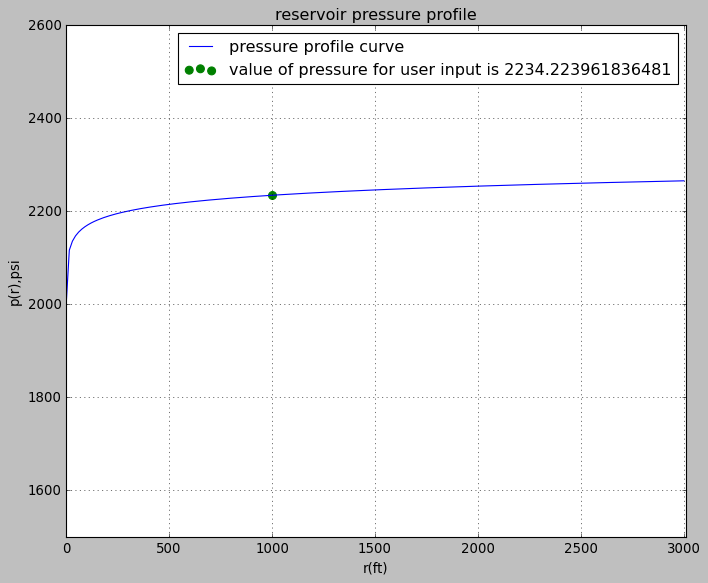

In [48]:
# re=3000,rw=0.25,pwf=2000,h=30,k=25,q=60,mu=2.5,user distance from well bore 1000ft
pressureprofile()

In [68]:
def pressureprofile():
    """pressure profile function will calculate the pressure profile at different radius values
    inside a reservoir, and after calculating it will plot radius vs pressure.
    will take inputs of: 
    re,
    rw,
    pwf,
    h,
    k,
    q,
    mu

    output:
    return: radius vs pressure
    plot: radius vs pressure"""
    re = float(input("outer radius of reservoir re(ft): "))
    rw = float(input("radius of well bore rw(ft): "))
    pwf = float(input("bottomhole pressure pwf(psi): "))
    h = float(input("net pay thickness or reservoir thickness h(ft): "))
    k = float(input("average reservoir permeability k(md): "))
    q = float(input("flowrate (stb/day) q: "))
    mu = float(input("oil viscosity mu: "))
    b = 1

    r_user = float(input("enter the distance(ft) from wellbore, where you want to find pressure: "))
    
    r = np.linspace(re,rw,200)
    p = pwf+((141.2*q*mu)/(k*h)*(np.log(r/rw)))

    p_user = pwf+((141.2*q*mu)/(k*h)*(np.log(r_user/rw)))

    #plotting
    plt.figure(figsize = [10,8])
    plt.plot(r,p,label= "pressure profile curve")
    plt.scatter(r_user,p_user,s= 50,color= "green", label= f"value of pressure for user input is {p_user}psi")
    plt.xlabel("r(ft)")
    plt.ylabel("p(r),psi")
    plt.xlim(rw-1,re+10)
    plt.ylim(pwf-500,p[-1]+800)
    plt.title("reservoir pressure profile")
    plt.legend()
    plt.grid(True)
    

    return r,p,p_user

outer radius of reservoir re(ft):  2000
radius of well bore rw(ft):  0.25
bottomhole pressure pwf(psi):  3000
net pay thickness or reservoir thickness h(ft):  30
average reservoir permeability k(md):  50
flowrate (stb/day) q:  60
oil viscosity mu:  5
enter the distance(ft) from wellbore, where you want to find pressure:  1000


(array([2.00000000e+03, 1.98995101e+03, 1.97990201e+03, 1.96985302e+03,
        1.95980402e+03, 1.94975503e+03, 1.93970603e+03, 1.92965704e+03,
        1.91960804e+03, 1.90955905e+03, 1.89951005e+03, 1.88946106e+03,
        1.87941206e+03, 1.86936307e+03, 1.85931407e+03, 1.84926508e+03,
        1.83921608e+03, 1.82916709e+03, 1.81911809e+03, 1.80906910e+03,
        1.79902010e+03, 1.78897111e+03, 1.77892211e+03, 1.76887312e+03,
        1.75882412e+03, 1.74877513e+03, 1.73872613e+03, 1.72867714e+03,
        1.71862814e+03, 1.70857915e+03, 1.69853015e+03, 1.68848116e+03,
        1.67843216e+03, 1.66838317e+03, 1.65833417e+03, 1.64828518e+03,
        1.63823618e+03, 1.62818719e+03, 1.61813819e+03, 1.60808920e+03,
        1.59804020e+03, 1.58799121e+03, 1.57794221e+03, 1.56789322e+03,
        1.55784422e+03, 1.54779523e+03, 1.53774623e+03, 1.52769724e+03,
        1.51764824e+03, 1.50759925e+03, 1.49755025e+03, 1.48750126e+03,
        1.47745226e+03, 1.46740327e+03, 1.45735427e+03, 1.447305

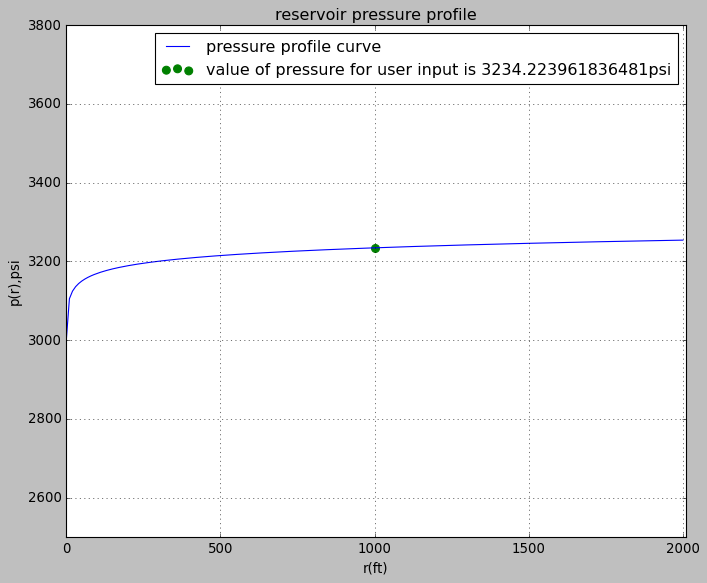

In [70]:
# re=2000,rw=0.25,pwf=3000,h=30,k=50,q=60,mu=5,user distance from well bore 1000ft
pressureprofile()

outer radius of reservoir re(ft):  2000
radius of well bore rw(ft):  0.25
bottomhole pressure pwf(psi):  3000
net pay thickness or reservoir thickness h(ft):  30
average reservoir permeability k(md):  50
flowrate (stb/day) q:  60
oil viscosity mu:  10
enter the distance(ft) from wellbore, where you want to find pressure:  1000


(array([2.00000000e+03, 1.98995101e+03, 1.97990201e+03, 1.96985302e+03,
        1.95980402e+03, 1.94975503e+03, 1.93970603e+03, 1.92965704e+03,
        1.91960804e+03, 1.90955905e+03, 1.89951005e+03, 1.88946106e+03,
        1.87941206e+03, 1.86936307e+03, 1.85931407e+03, 1.84926508e+03,
        1.83921608e+03, 1.82916709e+03, 1.81911809e+03, 1.80906910e+03,
        1.79902010e+03, 1.78897111e+03, 1.77892211e+03, 1.76887312e+03,
        1.75882412e+03, 1.74877513e+03, 1.73872613e+03, 1.72867714e+03,
        1.71862814e+03, 1.70857915e+03, 1.69853015e+03, 1.68848116e+03,
        1.67843216e+03, 1.66838317e+03, 1.65833417e+03, 1.64828518e+03,
        1.63823618e+03, 1.62818719e+03, 1.61813819e+03, 1.60808920e+03,
        1.59804020e+03, 1.58799121e+03, 1.57794221e+03, 1.56789322e+03,
        1.55784422e+03, 1.54779523e+03, 1.53774623e+03, 1.52769724e+03,
        1.51764824e+03, 1.50759925e+03, 1.49755025e+03, 1.48750126e+03,
        1.47745226e+03, 1.46740327e+03, 1.45735427e+03, 1.447305

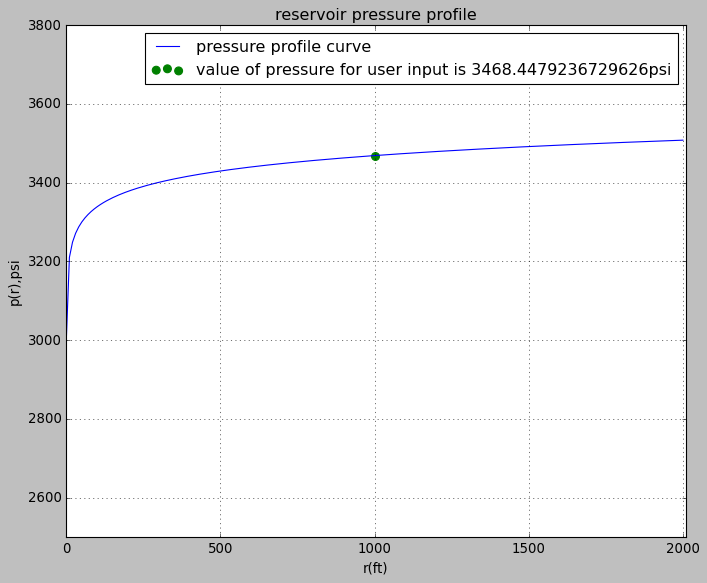

In [72]:
# re=2000,rw=0.25,pwf=3000,h=30,k=50,q=60,mu=10, user distance from well bore 1000ft
pressureprofile()

## dynamic pressure profile: visualize the effects of viscosity, flowrate and permeability

In [1]:
from ipywidgets import interactive
from IPython.display import display

In [3]:
def flowprofile(k,mu,q):
    re = 3000
    rw = 0.5
    r = np.linspace(rw,re,500)
    pe = 4000
    b = 1
    h = 30 #ft
    
    p = pe - (141.2*q*mu*b*(np.log(re/r))/k/h)
    
    pwf = p[np.where,r==rw]
    
    plt.plot(r,p,lw=40)
    plt.axhline(pwf,lw=3,color="red")
             
    plt.ylim(0,5000)
    plt.xlabel("r(ft)")
    plt.ylabel("p(r),psi")
             
    plt.title("reservoir pressure profile")
    plt.grid(True)
             
    return r,p

In [5]:
w = interactive(flowprofile,k = (50,1000), mu = (5,20), q = (100,300))

In [21]:
display(w)

interactive(children=(IntSlider(value=525, description='k', max=1000, min=50), IntSlider(value=12, description…

  ### (x-xcen)^2+(y-ycen)^2=r^2

In [90]:
r=5
x_cen=0
y_cen=0

In [92]:
x = np.linspace(-5,5,1000)

In [94]:
y = (r**2-x**2)**0.5

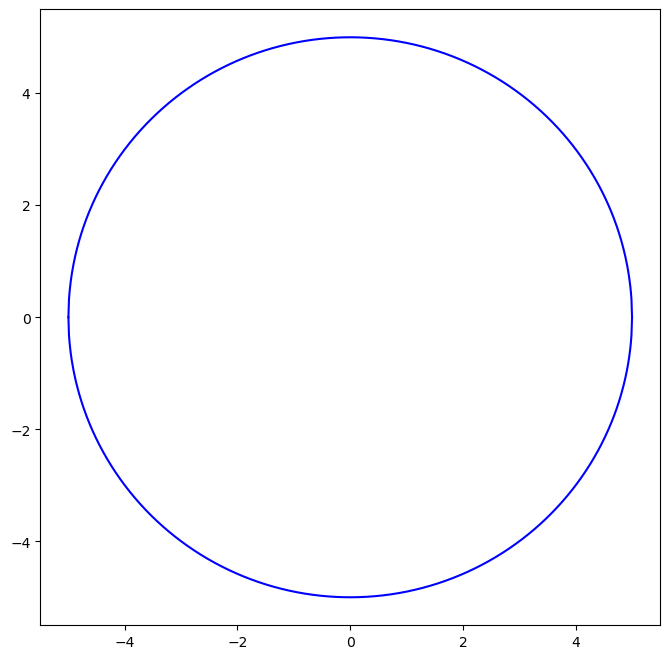

In [96]:
plt.figure(figsize=(8,8))
plt.plot(x,y,color="blue")
plt.plot(x,-y,color="blue")

In [11]:
def circle(r):
    x = np.linspace(-r,r,1000)
    y_p = (r**2-x**2)**0.5
    y_n = -y_p

    plt.figure(figsize=(8,8))
    plt.plot(x,y_p,color="blue")
    plt.plot(x,y-n,color="blue")

    plt.xlim(-r-5,r+5)
    plt.ylim(-r-5,r+5)

    plt.grid(True)

    plt.title(f"circle of radius {r}")
    plt.show()

    return x,y_p,y_n

In [13]:
circle_interactive = interactive(circle,r=(1,10))

In [19]:
display(circle_interactive)

interactive(children=(IntSlider(value=5, description='r', max=10, min=1), Output(outputs=({'traceback': ['\x1b…